# Import modules

In [1]:
# Code by: O, Wani, 2021

import numpy as np                      # for scientific computing and array analysis
import pandas as pd                     # for working with data strcutures
from scipy.integrate import odeint      # for working with ordinary differential equations
import scipy.stats as stats

# displaying plots inline 
%matplotlib inline                      

import matplotlib.pyplot as plt         # for 2D plotting

import math                             # for mathematical functions defined by the C standard
import statsmodels.api as sm            # for autocorrelation function
import os                               # for interacting with the operating system
import seaborn as sns                   # for 3D plotting
import astroabc                         # for inference of SDE parameters
import ipynb                            # for importing ipynb files as modules
import random                           # for pseudo-random number generators
import timeit

os.chdir('/home/waniomar/Office/Berkeley/Scripts/sde') # set working directory


In [2]:
from ipynb.fs.full.import_data import get_data, get_station_name 
# Import data

# import helper functions
from CatchmentBasics import *
from Data_analysis_helper import *

### Selected catchments

In [3]:
#### Numbers ####

#  HJ Andrews    - 4
#  Harvard       - 12
#  Hubbard       - 13
#  PlumIsland    - 18
#  Kellog        - 15


# Load data


In [4]:
# Define variables that contain the data of all catchments
discharge_obs= np.zeros([5,3000])
discharge_real= np.zeros([5,3000])
rain_obs = np.zeros([5,3000])
Temp_obs = np.zeros([5,3000])

In [5]:
#HJ Andrews
# load time series of rainfall, discharge, temperature 

Temp = np.array(get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
A_discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])
discharge_real[0,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[0,:] = discharge
rain_obs[0,:] = rain
Temp_obs[0,:] = Temp
#temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
#temp[temp<0]=0
#swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
#sweb = swe/np.amax(swe)

# A = 0.1

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [6]:
#  Harvard       - 12
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(12,['AirTemperature']).loc['2008-1-1':'2018-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(12,['Precipitation']).loc['2008-1-1':'2018-1-1'][0:3000]['HF001_Precipitation'])
A_discharge = np.asarray(get_data(12,['Discharge']).loc['2008-1-1':'2018-1-1'][0:3000]['NelsonWeir_Discharge'])
discharge_real[1,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[1,:] = discharge
rain_obs[1,:] = rain
Temp_obs[1,:] = Temp

Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']


In [7]:
# Hubbard 13
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(13,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['WS7_Precipitation'])
A_discharge = np.asarray(get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['WS7_Discharge'])
discharge_real[2,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[2,:] = discharge
rain_obs[2,:] = rain
Temp_obs[2,:] = Temp

Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']


In [8]:
#  PlumIsland     - 18
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(18,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['PIE_Precipitation'])
A_discharge = np.asarray(get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['Middleton_Discharge'])
discharge_real[3,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[3,:] = discharge
rain_obs[3,:] = rain
Temp_obs[3,:] = Temp

# A = 3

PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']


In [9]:
# Kellog 15
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(15,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['KBS002_Precipitation'])
A_discharge = np.asarray(get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['KBS096_Discharge'])
discharge_real[4,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[4,:] = discharge
rain_obs[4,:] = rain
Temp_obs[4,:] = Temp

Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']


# Define SDE

The rainfall runoff model can be described as a stochastic differential equation:


$d\mathcal{S}_t= [\mathcal{R}_t+\mathcal{M}_t-\mathcal{E}_t-\mathcal{Q}_t]\cdot dt+g(\mathcal{S}_t,\mathcal{R}_t)\cdot dW_t$ 

We see that: $ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{(d\mathcal{S}/dt)}$

Such that:
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{\mathcal{R}_t-\mathcal{Q}_t-\mathcal{M}_t-\mathcal{E}_t}$

We know that the recession equation for catchments, according to Brutsaert and Nieber [1977], is:
$-d\mathcal{Q}/dt = a\mathcal{Q}^b$

Assuming: $\mathcal{Q} \gg \mathcal{R}, \mathcal{M}, \mathcal{E} \\$
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{-\mathcal{Q}}$;
$ d\mathcal{Q}/d\mathcal{S} = a\mathcal{Q}^{b-1}$

Integrating both sides

$\int d\mathcal{S} = \int \frac{1}{a}\mathcal{Q}^{1-b}d\mathcal{Q}\\ $
$\mathcal{Q}=f(\mathcal{S})=\mathcal{Q_{ref}}(\mathcal{S}-\mathcal{S_o})^{1/(2-b)}/k$

Now let us define our modules for snowmelt and evapotranspiration 
(assuming they will have model deficits, which will be taken into account by the stochasticity in the SDE)

$\mathcal{M} = \texttt{ddf}\cdot (T-T_1)\\$
$\mathcal{E} =  E_{max}\cdot \frac{(T-T_{min})}{(T_{max}-T_{min})} + E_{min}\cdot \frac{(T_{max}-T)}{(T_{max}-T_{min})}$

The final effective discharge will be equal to 
$\mathcal{Q_{eff}}=A\cdot \mathcal{Q}$

The subprocesses we have: $\mathcal{S},\mathcal{R},\mathcal{M},\mathcal{E}$

The parameters we have: $A,b,k,\mathcal{S_o},\mathcal{Q_{ref}},\texttt{ddf},E_{max},E_{min}$

In [10]:
# Plots with uncertainty intervals

def sde(par, rain, Temp, runs, dt =1 , T = 3000):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.ones([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    Emax=par[5]; Emin=par[6];es=par[7] 
    
    E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
    M = ddf*np.maximum(Temp,0)
    
    for j in range(runs):
        for i in range(n - 1):
            x[i + 1,j] = x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)

        if np.isnan(np.sum(x[0:n,j]))==False:
            Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))
        else: 
            Qeff[:,j] = np.full(n, np.inf)
    
    return Qeff 

In [11]:
# Plots with uncertainty intervals

def sde(par, rain, Temp, runs, dt =1 , T = 3000):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    Emax=par[5]; Emin=par[6];bf = par[7]; es=par[8] 
    
    E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
    M = ddf*np.maximum(Temp,0)
    
    for j in range(runs):
        for i in range(n - 1):
            x[i + 1,j] =max(0,(bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)))

        if np.isnan(np.sum(x[0:n,j]))==False:
            Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))
        else: 
            Qeff[:,j] = np.full(n,np.inf)
    
    return Qeff 

In [12]:
# Define parameters
par0 = {'A':0.15,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par2 = {'A':1.0,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':-1.,'es':0.35}  
par3 = {'A':0.3,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.45}  
par4 = {'A':.2,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':1.,'es':0.45}  
# as a dictionary

par = np.empty((5,9))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

# Compute transfer entropy

In [13]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

X_1000 = rain_obs[4,:]
Y_1000 = discharge_obs[4,:]
Y_1000 = sde(par[4,:], rain_obs[4,:], Temp_obs[4,:],runs =1)

TE = te.te_compute(X_1000, Y_1000, k=1, embedding=1, safetyCheck=False, GPU=False)

print(TE)

/home/waniomar/anaconda3/lib/python3.8/site-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


4.187866447098635


# Preliminary anlysis of the storage-discharge relationship

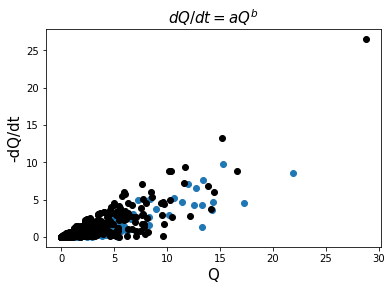

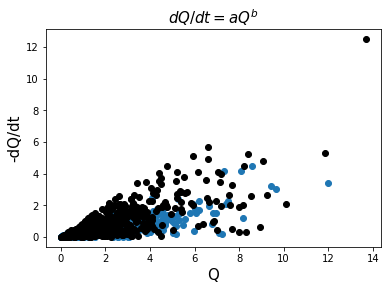

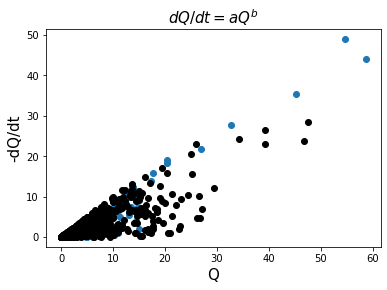

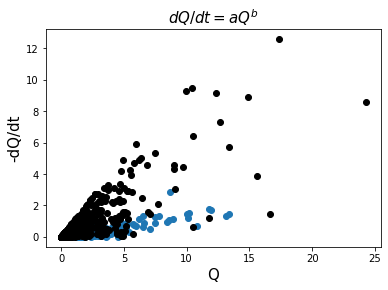

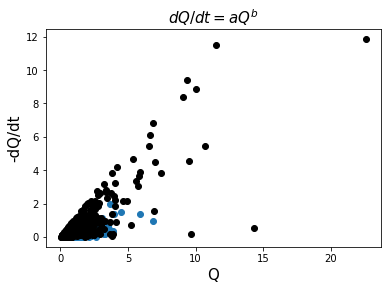

In [14]:
for i in range(5):
    par[i,:]
    #par_test = {'A':1,'b':1.,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.0} 
    #par_test = np.array(list(par_test.values()))

    
    plt.figure(i)
    
    Q = discharge_obs[i,:]
    indices = [i for i in range(len(Q)-4) if (Q[i]>Q[i+1]>Q[i+2]>Q[i+3])] 
    #discharge_special = discharge_obs[i,:][np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    discharge_special = Q[indices]    
    dQ = np.diff(discharge_special)

    ind = np.where(np.diff(np.where(dQ<0))==1)    
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)])
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(0.1, 55)
    #plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)
    
    
    discharge = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()
    Q = discharge
    #indices = [i for i in range(len(Q)-4) if (Q[i]<Q[i+1]<Q[i+2]<Q[i+3])] 
    #discharge_special = discharge[np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    discharge_special = Q[indices] 
    dQ = np.diff(discharge_special)
        
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)],color ="black")
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(0.1, 55)
    #plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)

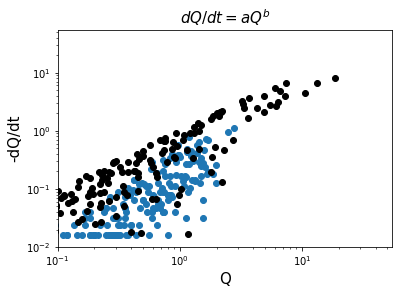

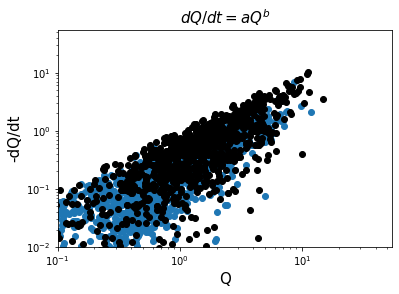

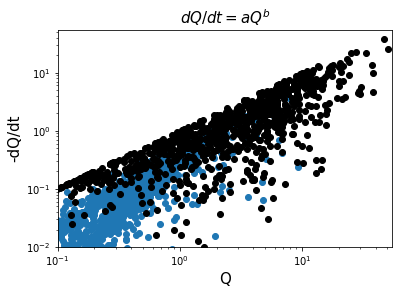

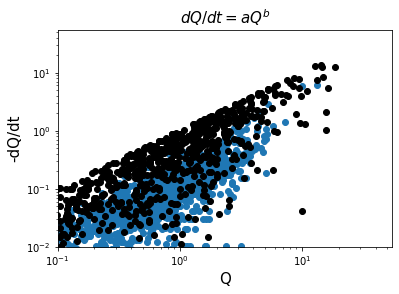

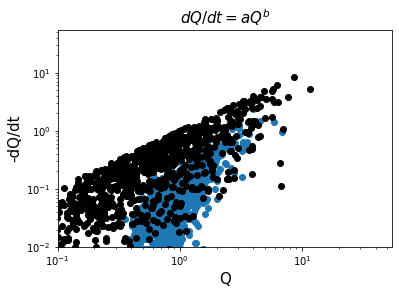

In [15]:
for i in range(5):
    par[i,:]
    #par_test = {'A':1,'b':1.,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.0} 
    #par_test = np.array(list(par_test.values()))

    
    plt.figure(i)

    discharge_special = discharge_obs[i,:][np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    dQ = np.diff(discharge_special)

    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(0.1, 55)
    plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)
    
    
    discharge = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()
    discharge_special = discharge[np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    dQ = np.diff(discharge_special)
        
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)],color ="black")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(0.1, 55)
    plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  23,  24,  25,  26,  27,  28,  29,  30]),
 array([0.26703543, 0.27095659, 0.27558762, 0.28138124, 0.29540347,
        0.30162281, 0.30058874, 0.30051143, 0.29851883, 0.29586272,
        0.29572975, 0.29454426, 0.2858238 , 0.28718381, 0.29022076,
        0.29633226, 0.29393515, 0.28942678, 0.29026102, 0.29939218,
        0.31539139, 0.33915581, 0.36250084, 0.39129655, 0.42554056,
        0.47019991, 0.51871008, 0.60221836, 0.71697763, 0.85396664,
        1.        , 0.85396664, 0.71697763, 0.60221836, 0.51871008,
        0.47019991, 0.42554056, 0.39129655, 0.36250084, 0.33915581,
        0.31539139, 0.29939218, 0.29026102, 0.28942678, 0.29393515,
        0.29633226, 0.29022076, 0.2871838

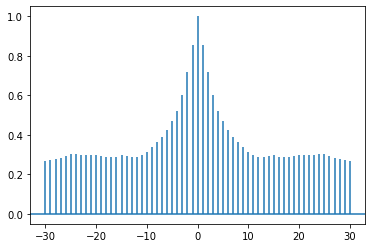

In [16]:
plt.acorr(discharge, maxlags = 30)

# Generate hydrographs

In [17]:
# Define parameters
par0 = {'A':0.15,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par2 = {'A':1.0,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':-1.,'es':0.35}  
par3 = {'A':0.3,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.45}  
par4 = {'A':.2,'b':1.1,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':1.,'es':0.45}  
# as a dictionary

par = np.empty((5,9))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

In [18]:
discharge_sim = np.zeros([5,3000])

for i in range(5):
    discharge_sim[i,:] = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()

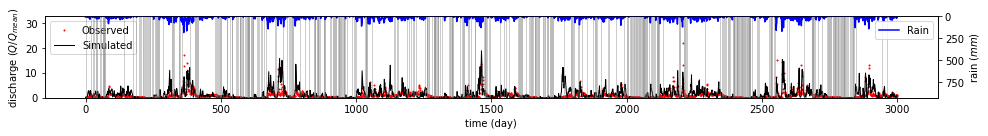

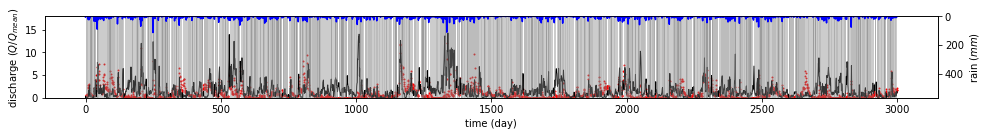

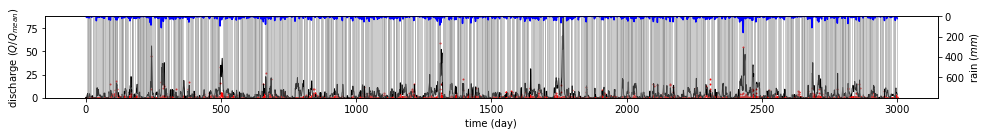

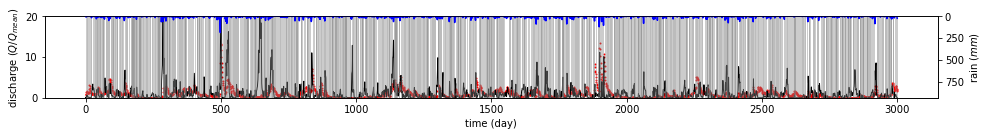

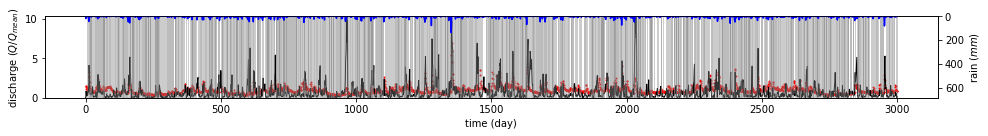

In [19]:
for i in range(5):
    fig, ax_left = plt.subplots(figsize=(16, 1.5))
    
    ax_right = ax_left.twinx()

    ax_left.plot(discharge_obs[i,:], '.',color='red',markersize =2)
    ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.4, color ="gray")
    ax_left.set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left.set_xlabel('time (day)')
    ax_left.set_ylabel(r'discharge $(Q/Q_{mean})$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left.legend(['Observed','Simulated'], loc = 'upper left' )
    

In [20]:
# Define parameters
par0 = {'A':0.15,'b':1.5,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.5,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par2 = {'A':1.0,'b':1.5,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':-1.,'es':0.35}  
par3 = {'A':0.3,'b':1.5,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.45}  
par4 = {'A':.2,'b':1.5,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':1.,'es':0.45}  
# as a dictionary

par = np.empty((5,9))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

In [21]:
discharge_sim_en = np.zeros([5,3000, 100])

for i in range(5):
    discharge_sim_en[i,:,:] = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =100)

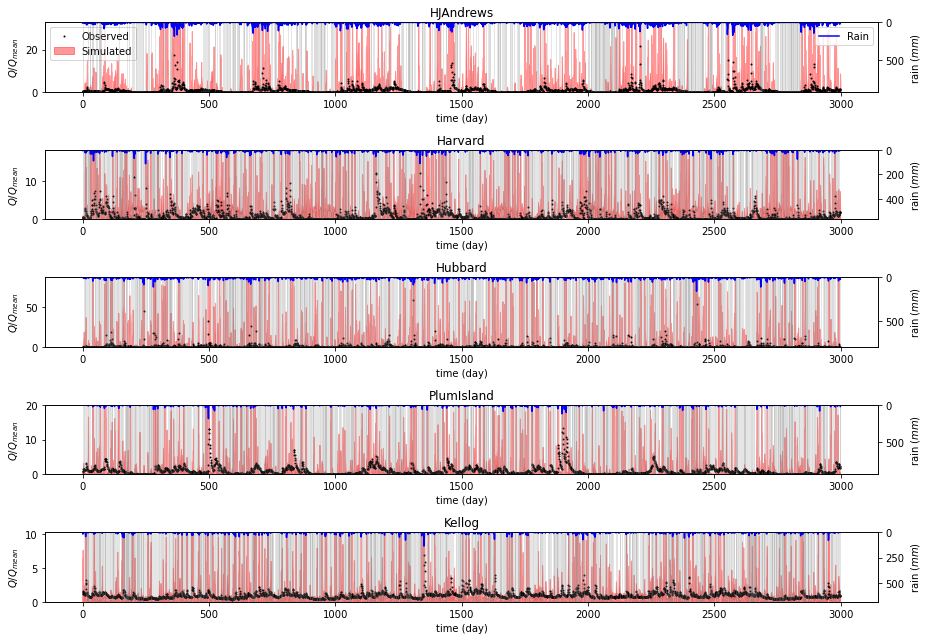

In [22]:
# Plot with parametric uncertainty
fig, ax_left = plt.subplots(5, figsize=(13, 9))
name =["HJAndrews","Harvard","Hubbard","PlumIsland","Kellog"]
for i in range(5):
    
    ax_right = ax_left[i].twinx()

    ax_left[i].plot(discharge_obs[i,:], '.',color='black',markersize =2)
    #ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)
    ax_left[i].fill_between(np.linspace(0., 3000, 3000),np.percentile(discharge_sim_en[i,:,:], 5, axis=1), np.percentile(discharge_sim_en[i,:,:], 95, axis=1), color='red', alpha=0.4)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()

plt.savefig('images/hydrograph.jpg')

In [23]:
# Reliability
n=np.zeros(5)

for i in range(5):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(3000):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1
n/3000*100            

# Reliability
ns=np.zeros(5)

for i in range(5):
    mn = np.mean(discharge_sim_en[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:]-mn)**2)/np.mean((discharge_obs[i,:]-np.mean(discharge_obs[i,:]))**2)
    
ns

In [28]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

TE=np.zeros([5,3])

for i in range(5):
    X_1000 = rain_obs[i,:]
    Y_1000 = discharge_obs[i,:]
    Y_en = discharge_sim_en[i,:,1]
    Y_mn = np.mean(discharge_sim_en[i,:,:],axis=1)

    TE[i,0] = te.te_compute(X_1000, Y_1000, k=1, embedding=1, safetyCheck=False, GPU=False)
    TE[i,1] = te.te_compute(X_1000,Y_mn, k=1, embedding=1, safetyCheck=False, GPU=False)
    TE[i,2] = te.te_compute(X_1000, Y_en , k=1, embedding=1, safetyCheck=False, GPU=False)

In [29]:
TE

array([[0.78885512, 1.16987757, 1.21826756],
       [3.55392328, 3.85573624, 3.53058751],
       [3.20345607, 2.30148997, 1.22484978],
       [3.62020111, 3.70473889, 2.9661837 ],
       [3.7216385 , 4.2449439 , 3.90890859]])

In [55]:
# Temp = (get_data(4,['AirTemperature'])[15750:17750]).mean(axis=1)


# E_max1 = 5
# E_max2 = 10
# E_min = 2

# E1 = E_max1*(Temp-Temp.min())/(Temp.max()-Temp.min())+ E_min*(Temp.max()-Temp)/(Temp.max()-Temp.min())
# E2 = E_max2*(Temp-Temp.min())/(Temp.max()-Temp.min())+ E_min*(Temp.max()-Temp)/(Temp.max()-Temp.min())

# example_evaporation = pd.DataFrame({
#     r'$\mathcal{E}_1$': E1,
#     r'$\mathcal{E}_2$': E2})

# example_evaporation.plot(ylabel='evapotranspiration [mm/d]',figsize =(15,3))

In [54]:
# Temp = (get_data(4,['AirTemperature'])[15750:17750]).mean(axis=1)


# ddf1 = 0.2
# ddf2 = 0.5


# M1 = ddf1*np.maximum(Temp,0)
# M2 = ddf2*np.maximum(Temp,0)

# example_snowmelt = pd.DataFrame({
#     r'$\mathcal{M}_1$': M1,
#     r'$\mathcal{M}_2$': M2})

# example_snowmelt.plot(ylabel='snowmelt [mm/d]', figsize =(15,3))

# Inference

In [32]:
def dist_metric(d,x):
    return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
#dist_metric(data, discharge[0:1500])
def dist_metric(d,x):
    return np.mean(np.abs(d - x))

In [33]:
# Define parameters
par0 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.25}  
par2 = {'A':1.0,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.25}  
par3 = {'A':0.4,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.1}  
par4 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
# as a dictionary

part = np.empty((5,9))


for i in range(5):
    part[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

In [46]:
priors0 =  [('uniform', [0.15, 0.25]),('uniform', [0.9,1.1]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,0.1]),         # Qref, ddf
           ('uniform', [0.015, 0.025]),('uniform', [0.00,0.01]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.3,0.5])]# es, er

priors1 =  [('uniform', [0.25, 0.35]),('uniform', [0.9,1.1]),         # A,b
           ('uniform', [0.8,2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,0.1]),        # Qref, ddf
           ('uniform', [0.015, 0.025]),('uniform', [0.00,0.01]),      # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er

priors2 =  [('uniform', [0.95, 1.05]),('uniform', [0.9,1.1]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,0.1]),         # Qref, ddf
           ('uniform', [0.00015, 0.00025]),('uniform', [0.00,0.01]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er


priors3 =  [('uniform', [0.35, 0.45]),('uniform', [0.9,1.1]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,0.1]),       # Qref, ddf
           ('uniform', [0.015, 0.025]),('uniform', [0.00,0.01]),        # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er

priors4 =  [('uniform', [0.15, 0.25]),('uniform', [0.9,1.1]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,0.1]),     # Qref, ddf
           ('uniform', [0.015, 0.025]),('uniform', [0.00,0.01]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.3,0.5])]# es, er

priors = [priors0,priors1,priors2,priors3,priors4]

In [35]:
# # Original wide priors

# #HJA priors =  [('uniform', [20000, 400000]),('uniform', [0.01,2]),('uniform', [0.005,0.06]),('uniform', [0.001,0.04])] HJ Andrews
# #kellogg priors =  [('uniform', [350, 530]),('uniform', [0.01,2]),('uniform', [0.0001,0.01]),('uniform', [0.0001,0.05])]
# #par = {'A':1,'b':1.3,'k':2,'So':1,'Qref':0.3,'ddf':0.3,'Emax':0.1,'Emin':0.,'es':0.05,'er':0.1} 
# #par  = [1, 1., 2,0.3, 0., 0., 0., 0.005,0.4] 
# priors0 =  [('uniform', [0.1, 0.5]),('uniform', [0,1.5]),         # A,b
#            ('uniform', [0.8, 2]),                                   # k,
#            ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
#            ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
#            ('uniform', [0.,0.01]),                        # bf
#            ('uniform', [0.3,0.5])]# es, er

# priors1 =  [('uniform', [0.1, 0.5]),('uniform', [0,1.5]),         # A,b
#            ('uniform', [0.8, 2]),                                   # k,
#            ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
#            ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
#            ('uniform', [0.,0.01]),                        # bf
#            ('uniform', [0.1,0.5])]# es, er

# priors2 =  [('uniform', [0.7, 1.2]),('uniform', [0,1.5]),         # A,b
#            ('uniform', [0.8, 2]),                                   # k,
#            ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
#            ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
#            ('uniform', [0.,0.01]),                        # bf
#            ('uniform', [0.1,0.5])]# es, er


# priors3 =  [('uniform', [0.2, 0.8]),('uniform', [0,1.5]),         # A,b
#            ('uniform', [0.8, 2]),                                   # k,
#            ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
#            ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
#            ('uniform', [0.,0.01]),                        # bf
#            ('uniform', [0.1,0.5])]# es, er

# priors4 =  [('uniform', [0.1, 0.4]),('uniform', [0,1.5]),         # A,b
#            ('uniform', [0.8, 2]),                                   # k,
#            ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
#            ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
#            ('uniform', [0.,0.01]),                        # bf
#            ('uniform', [0.3,0.5])]# es, er

# priors = [priors0,priors1,priors2,priors3,priors4]

In [64]:
%%capture
for i in range(5):
    prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':('{}{}{}'.format('data/', i,'.txt')), 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':10}
    sampler = astroabc.ABC_class(9,100,discharge_obs[i,0:1500],[50,6.5],1000,priors[i],**prop)
    def sde2(parm):
        x = sde(par=parm, rain = rain_obs[i,:], Temp = Temp_obs[i,:], runs=1, dt =1 , T = 1500).flatten()
        #dist = dist_metric(d=discharge_obs[i,0:1500],x=x)
        #print(dist)
        return x
    
    start = timeit.default_timer()
    sampler.sample(sde2)
    stop = timeit.default_timer()
    print('Time: ', stop - start) 


# Import samples

In [65]:
par = np.empty((5,9))

for i in range(5):
    # import  samples
    #data = ("data/0.txt")
    samples  =  pd.DataFrame(np.loadtxt('{}{}{}'.format('data/', i,'.txt'), skiprows=1))
    samplespar = samples[samples.columns[0:9]]
    globals()['samplespar%s' % i] = samplespar 
    # Plot the trace of samples 

    #samplespar.plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Sample traces')
    #samplespar.plot(kind='hist',y ='AMS_cdx', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')
    
    #fig = sns.pairplot(samplespar)
    #fig.savefig('images/konza_posterior.jpg',dpi = 150)
    par[i,:] = [np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),
           np.asarray(samplespar)[:,2].mean(),np.asarray(samplespar)[:,3].mean(),
          np.asarray(samplespar)[:,4].mean(),np.asarray(samplespar)[:,5].mean(),
          np.asarray(samplespar)[:,6].mean(),np.asarray(samplespar)[:,7].mean(),
          np.asarray(samplespar)[:,8].mean()]
    #par = np.array(samplespar)[pd.read_csv(filepath_or_buffer=data, delimiter  =' ',header =0)["\t.1"].idxmax(),:]

In [66]:
par

array([[2.02024815e-01, 9.98465200e-01, 1.47239092e+00, 8.45817650e-01,
        5.61615800e-02, 1.93139550e-02, 5.53975500e-03, 4.53438500e-03,
        4.06770610e-01],
       [2.99329465e-01, 1.00487627e+00, 1.54615110e+00, 1.03788574e+00,
        5.01777900e-02, 1.99326750e-02, 4.75184500e-03, 5.02713000e-03,
        2.94713980e-01],
       [1.00149268e+00, 1.00967674e+00, 1.51309790e+00, 8.79292410e-01,
        4.44596600e-02, 1.97580000e-04, 5.38494000e-03, 5.19826500e-03,
        3.19214330e-01],
       [3.98098515e-01, 9.88390735e-01, 1.43278934e+00, 9.64182685e-01,
        4.93859400e-02, 2.01393950e-02, 4.70090500e-03, 4.87383500e-03,
        2.90555850e-01],
       [1.99587795e-01, 9.93516205e-01, 1.39953198e+00, 8.71685480e-01,
        4.74791400e-02, 1.96960600e-02, 4.77344500e-03, 4.59142000e-03,
        4.06004525e-01]])

In [67]:
discharge_sim_en = np.zeros([5,3000, 100])

for i in range(5):
    discharge_sim_en[i,:,:] = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =100)

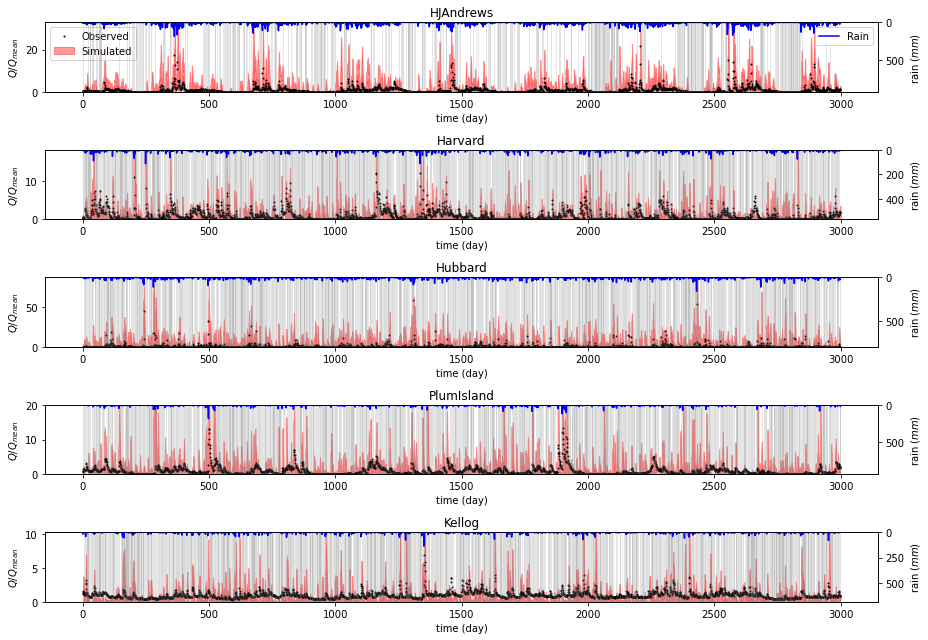

In [68]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(5, figsize=(13, 9))
name =["HJAndrews","Harvard","Hubbard","PlumIsland","Kellog"]
for i in range(5):
    
    ax_right = ax_left[i].twinx()

    ax_left[i].plot(discharge_obs[i,:], '.',color='black',markersize =2)
    #ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)
    ax_left[i].fill_between(np.linspace(0., 3000, 3000),np.percentile(discharge_sim_en[i,:,:], 5, axis=1), np.percentile(discharge_sim_en[i,:,:], 95, axis=1), color='red', alpha=0.4)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()

plt.savefig('images/hydrograph.jpg')

In [69]:
# Reliability
n=np.zeros(5)

for i in range(5):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(3000):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

print(n/3000*100)            

# Reliability
ns=np.zeros(5)

for i in range(5):
    mn = np.mean(discharge_sim_en[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:]-mn)**2)/np.mean((discharge_obs[i,:]-np.mean(discharge_obs[i,:]))**2)
    
print(ns)

[62.53333333 33.16666667 45.96666667 36.8        32.33333333]
[-1.92690243 -0.58188473 -7.82528639 -3.94347751 -2.97852021]


In [70]:
# Plot with parametric uncertainty
discharge_sim_en = np.zeros([5,3000, 100])

for i in range(5):
    for j in range(100):
        discharge_sim_en[i,:,j] = sde(np.array(eval('{}{}'.format('samplespar', i)))[j*9,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()

IndexError: index 207 is out of bounds for axis 0 with size 200

In [ ]:
# Plot with parametric uncertainty
fig, ax_left = plt.subplots(5, figsize=(13, 9))
name =["HJAndrews","Harvard","Hubbard","PlumIsland","Kellog"]
for i in range(5):
    
    ax_right = ax_left[i].twinx()

    ax_left[i].plot(discharge_obs[i,:], '.',color='black',markersize =2)
    #ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)
    ax_left[i].fill_between(np.linspace(0., 3000, 3000),np.percentile(discharge_sim_en[i,:,:], 5, axis=1), np.percentile(discharge_sim_en[i,:,:], 95, axis=1), color='red', alpha=0.4)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()

plt.savefig('images/hydrograph.jpg')

In [ ]:
# Reliability
n=np.zeros(5)

for i in range(5):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(3000):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

print(n/3000*100)            

# Reliability
ns=np.zeros(5)

for i in range(5):
    mn = np.mean(discharge_sim_en[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:]-mn)**2)/np.mean((discharge_obs[i,:]-np.mean(discharge_obs[i,:]))**2)
    
print(ns)

# Create the distribution of time to peak

In [290]:
from scipy.signal import argrelextrema

# for local maxima
dis_max =np.asarray(argrelextrema(discharge, np.greater))[0,:]
rain_max =np.asarray(argrelextrema(rain, np.greater))[0,:]

type(dis_max)

# for local minima
#argrelextrema(x, np.less)

numpy.ndarray

In [ ]:
rain_max.shape

In [ ]:
sns.kdeplot(rain_max, bw = 0.5)

In [ ]:
from PyIF import te_compute as te
import numpy as np
rand = np.random.RandomState(seed=23)

X_1000 = rain
Y_1000 = discharge

TE = te.te_compute(X_1000, Y_1000, k=1, embedding=2, safetyCheck=False, GPU=False)

print(TE)

# Performance

In [ ]:

ci5 = np.percentile(sim, 5, axis=1)
ci95 = np.percentile(sim, 95, axis=1)

n=0
for i in range(1500):
    if  ci5[i] < discharge[i] and ci95[i] > discharge[i]:
        n = n+1

In [ ]:
#Reliability

ci5 = np.percentile(sim, 5, axis=1)
ci95 = np.percentile(sim, 95, axis=1)

n=0
for i in range(1500):
    if  ci5[1500+i] < discharge[1500+i] and ci95[1500+i] > discharge[1500+i]:
        n = n+1


In [ ]:
n/1500*100  

#HJ Andrew
# 63.3 calibration
# 67.8 validation

#Kellog
# 72.66 calibration
# 70.66 validation

#Konza 
#18.33 calibration
# 18.94 validation

# Generate dynamic plot

In [ ]:
data = sim[:,1] #Generating data.
#plt.figure(figsize = (5,5))
sns.kdeplot(data , bw = 0.5)# , fill = True)
plt.axvline(1 , 0,1, color = 'black')
plt.ylabel('dynamic probability density', fontsize = 15)
plt.xlabel('system response', fontsize = 15)
plt.legend(framealpha=1, frameon=True)
plt.title('HJ Andrews')
plt.show()

In [ ]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [ ]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [ ]:
save_folder = 'images/dynamicprobability'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [ ]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (8,5))
   sns_plot = sns.kdeplot(data , bw = 0.5)# , fill = True)
   #plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 1000000)
   plt.ylim(0, (25*10**(-6)))
   plt.ylabel('dynamic probability density', fontsize = 15)
   plt.xlabel('system response', fontsize = 15)
   plt.legend(framealpha=1, frameon=True)
   plt.title('konza')
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [ ]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (8,5))
   sns_plot = sns.kdeplot(data , bw = 0.5)# , fill = True)
   #plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 10000)
   plt.ylim(0, (10*10**(-3)))
   plt.ylabel('dynamic probability density', fontsize = 15)
   plt.xlabel('system response', fontsize = 15)
   plt.legend(framealpha=1, frameon=True)
   plt.title('konza')
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [ ]:
for n in range(140):
    plot_phase(n)

In [ ]:
# load all the static images into a list
save_folder = 'images/dynamicprobability'
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-dynamicprob_HJA.gif'

In [ ]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = 800 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:],quality=50)

In [ ]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) 

In [ ]:
#IPdisplay.Image(url=gif_filepath)